# Exercise  1
Given a dataset with 9 observations and two features:

| | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 
| --- | --- | --- | --- | --- | --- | --- | --- |  --- | --- |
| $y$ | -7.79 | -5.37 | -4.08 | -1.97 | 0.02 | 2.05 | 1.93 | 2.16 | 2.13|
| $x_1$ | -1.00 | -0.75 | -0.50 | -0.25 | 0.00 | 0.25 | 0.50 | 0.75 | 1.00 | 
| $x_2$ | 0.01 | 0.44  | 0.74| 0.95| 0.98| 0.94 | 0.76 | 0.42| 0.02|

a) Implement the Pearson correlation.

b) Calculate the Pearson correlation of $x_1$ and $x_2$ and check your results with a given function of a Python library.

c) Interpret the result, are $x_1$ and $x_2$ correlated?

d) Plot the points $(x_1, x_2)$ in a figure. Is the Pearson correlation coefficient a reliable measure to detect dependencies for this example dataset.

e) Calculate the "Mutual Information" (on paper). Is this a more suitable measure for this example? \
Hint: 1) Make histograms of $x_1$ and $x_2$. For $x_1$ use the intervals $[-1,-0.5), [-0,5, 0), [0,0.5), [0,5,1)$  and for $x_2$ the intervals $[0,0.5), [0,5,1)$. \
2) Take mean values (of the histogram) as replacement for the values in $x_1$ and $x_2$. \
3) Create a table with the joint and marginal distribution of the new values for $x_1^*$ and $x_2^*$.

# Soution 1
#### a) Implement the Pearson correlation.

In [1]:
import numpy as np

In [2]:
def pearson_correlation(x1,x2):
    if not (isinstance(x1, (list, np.ndarray)) and isinstance(x2, (list, np.ndarray))):
        raise ValueError("Input datasets must be lists or 1-dimensional NumPy arrays")
    
    if not (len(x1) == len(x2) and x1.ndim == 1 and x2.ndim == 1):
        raise ValueError("Input datasets must be 1-dimensional and of the same length")

    x1_mean = np.mean(x1)
    x2_mean = np.mean(x2)
    numerator = np.sum((x1-x1_mean)*(x2-x2_mean))
    denominator=  np.sqrt(np.sum((x1-x1_mean)**2))*np.sqrt(np.sum((x2-x2_mean)**2))
    
    if (denominator == 0):
        raise ValueError("Denominator is 0.")
    else:
        p = numerator/denominator

    return p

#### b) Calculate the Pearson correlation of 𝑥1 and 𝑥2 and check your results with a given function of a Python library.

In [3]:
x1 = np.array([ -1.00, -0.75, -0.50, -0.25, 0.00 , 0.25, 0.50, 0.75, 1.00])
x2 = np.array([0.01, 0.44, 0.74, 0.95, 0.98, 0.94, 0.76, 0.42, 0.02 ])

pearson_correlation(x1,x2)

0.0011945348429373496

In [4]:
import scipy.stats
scipy.stats.pearsonr(x1, x2)[0] 

0.001194534842937342

#### c) Interpret the result, are 𝑥1 and 𝑥2 correlated?

The Pearson correlation coefficient is close to 0 $\implies$ there is no linear relationship between x1 and x2.

#### d) Plot the points $(x_1,x_2)$ in a figure. Is the Pearson correlation coefficient a reliable measure to detect dependencies for this example dataset.

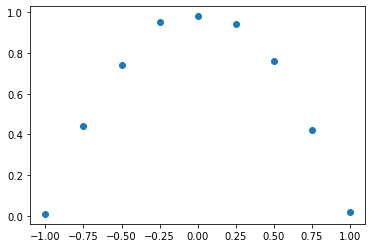

In [5]:
from matplotlib import pyplot as plt
plt.scatter(x1, x2)

The scatter plot reveals that there is a strong non-linear/quadratic relationship between $x_1$ and $x_2$. The Pearson
correlation coefficients is not suitable for detecting non-linear relationships.

#### e) Calculate the "Mutual Information" (on paper). Is this a more suitable measure for this example? 

Problem: distribution needed.
Solution: e.g. histograms

Make histograms of $x_1$ and $x_2$. For $x_1$ use the intervals $[-1,-0.5), [-0,5, 0), [0,0.5), [0,5,1)$  and for $x_2$ the intervals $[0,0.5), [0,5,1)$.

(array([2., 2., 2., 3.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ]),
 <BarContainer object of 4 artists>)

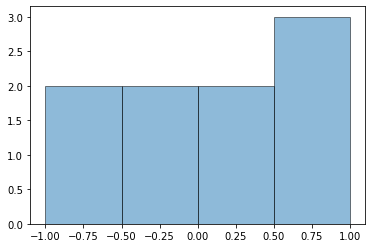

In [6]:
plt.hist(x1, bins=4, alpha=0.5, histtype='bar', ec='black')

(array([4., 5.]), array([0. , 0.5, 1. ]), <BarContainer object of 2 artists>)

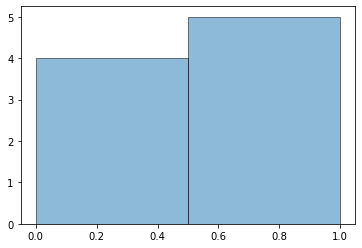

In [7]:
plt.hist(x2, bins=2, alpha=0.5, histtype='bar', ec='black', range=(0,1))

2) Take mean values (of the histogram) as replacement for the values in $x_1$ and $x_2$. 


| | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 
| --- | --- | --- | --- | --- | --- | --- | --- |  --- | --- |
| $x_1^*$ | -0.75 | -0.75 | -0.25 | -0.25 | 0.25 | 0.25 | 0.75 | 0.75 | 0.75 | 
| $x_2^*$ | 0.25 | 0.25  | 0.75| 0.75| 0.75| 0.75 | 0.75 | 0.25| 0.25|

3) Create a table with the joint and marginal distribution of the new values for $x_1^*$ and $x_2^*$. (Imagine a line at the last row and column of the table)

| $x_1^*$ / $x_2^*$| 0.25 | 0.75 |  $p_{x_1^*}$  | 
|  -------- | ---- | ---- | ---- | 
| $-0.75$| $\frac{2}{9}$ |$0$ | $\frac{2}{9}$ | 
| $-0.25$ | $0$ | $\frac{2}{9}$ | $\frac{2}{9}$| 
| $0.25$| $0$ |$\frac{2}{9}$ | $\frac{2}{9}$ | 
| $0.75$ | $\frac{2}{9}$ | $\frac{1}{9}$ | $\frac{3}{9}$|  
|  $p_{x_2^*}$ | $\frac{4}{9}$ | $\frac{5}{9}$ |$1$ |


Now we can calculate the approximate MI:

\begin{align}
MI( x_1^*; x_2^*) &= \sum_{x_1^*} \sum_{x_2^*} p(x_1^*, x_2^*) \log\left(\frac{p( x_1^*, x_2^*)}{p( x_1^*) p(x_2^*)}\right)\\
&= \frac{2}{9} \cdot \log \left(\frac{\frac{2}{9}}{\frac{4}{9} \cdot \frac{2}{9}} \right) 
+ \frac{2}{9} \cdot \log \left(\frac{\frac{2}{9}}{\frac{5}{9} \cdot \frac{2}{9}} \right)
+ \frac{2}{9} \cdot \log \left(\frac{\frac{2}{9}}{\frac{5}{9} \cdot \frac{2}{9}} \right)
+ \frac{2}{9} \cdot \log \left(\frac{\frac{2}{9}}{\frac{4}{9} \cdot \frac{3}{9}} \right)
+ \frac{1}{9} \cdot \log \left(\frac{\frac{1}{9}}{\frac{5}{9} \cdot \frac{3}{9}} \right) \\
&= \frac{2}{9} \left[\log \left(\frac{9}{4}\right) + 2 \log \left(\frac{9}{5}\right) +\log \left(\frac{3}{2}\right) \right] +  \frac{1}{9} \log \left(\frac{3}{2}\right) \\
&= 0.4748
\end{align}

$\implies$ MI shows that there is a dependency.

# Exercise 2
Consider the following functions:

i) $f(\boldsymbol{x}) = 3x_1+ x_2^2 $

ii) $f(\boldsymbol{x}) = -x_1+ 2x_2 + \log\left(\frac{x_1}{x_2^3}\right)$

iii) $f(\boldsymbol{x})= x_1 - x_2 + 5|x_1|x_2^2$

Check mathematically (on paper) if interactions are present.

# Solution 2
#### i) 
Since the function is already separable and 

\begin{align}
\mathbb{E}\left[\frac{\partial ^2 f(\boldsymbol{x}) } {\partial x_1 \partial x_2}  \right]^2 
= \mathbb{E}\left[\frac{\partial ^2 } {\partial x_1 \partial x_2} (3x_1+ x_2^2) \right]^2
= \mathbb{E}\left[\frac{\partial  } {\partial x_1}  2x_2 \right]^2 
= \mathbb{E}\left[0 \right]^2 = 0,
\end{align}

there are no interactions between the features.


#### ii)

\begin{align}
f(\boldsymbol{x}) = -x_1+ 2x_2 + \log\left(\frac{x_1}{x_2^3}\right)= -x_1+ 2x_2 + \log(x_1) - 3 \log(x_2) 
\end{align}

$\implies f(\boldsymbol{x}) = f_1(\boldsymbol{x}_1) +  f_2(\boldsymbol{x}_2) $ with $f_1(\boldsymbol{x}_1) = -x_1+ \log(x_1)$ and $f_2(\boldsymbol{x}_2) = 2x_2 - 3 \log(x_2) $

$\implies$ no interactions due to separability, also:

\begin{align}
\mathbb{E}\left[\frac{\partial ^2 f(\boldsymbol{x}) } {\partial x_1 \partial x_2}  \right]^2 
&= \mathbb{E}\left[\frac{\partial ^2 } {\partial x_1 \partial x_2} \left(-x_1+ 2x_2 + \log\left(\frac{x_1}{x_2^3}\right)\right) \right]^2 \\
&= \mathbb{E}\left[\frac{\partial ^2 } {\partial x_1 \partial x_2} \left(-x_1+ 2x_2 + \log(x_1) - 3 \log(x_2) \right) \right]^2 \\
&= \mathbb{E}\left[\frac{\partial } {\partial x_1} \left(2 - 3 \frac{1}{x_2}\right) \right]^2 \\
&= \mathbb{E}\left[0 \right]^2 = 0
\end{align}

#### iii)
Since the function $f(\boldsymbol{x})= x_1 - x_2 + 5|x_1|x_2^2$ is not differentiable for $x_1 = 0$, we need to consider different cases: $x_1 > 0$, $x_1 < 0$ and $x_1 = 0$.

- Case 1: $x_1 > 0$

    Let's first consider the partial derivatives.
    \begin{align}
    \frac{\partial ^2 f(\boldsymbol{x}) } {\partial x_1 \partial x_2} 
    = \frac{\partial ^2 } {\partial x_1 \partial x_2} (x_1 - x_2 + 5x_1x_2^2)
    = \frac{\partial} {\partial x_1} ( -1 + 10x_1x_2) = 10x_2
    \end{align}
    Then
    \begin{align}
    \mathbb{E}\left[\frac{\partial ^2 f(\boldsymbol{x}) } {\partial x_1 \partial x_2}  \right]^2 
    = \mathbb{E}[10 x_2]^2=10^2\mathbb{E}[x_2]^2 > 0.
    \end{align}
- Case 2: $x_1 < 0$
\begin{align}
\frac{\partial ^2 f(\boldsymbol{x}) } {\partial x_1 \partial x_2} 
= \frac{\partial ^2 } {\partial x_1 \partial x_2} (x_1 - x_2 - 5x_1x_2^2)
= \frac{\partial} {\partial x_1} ( -1 - 10x_1x_2) = -10x_2
\end{align}
Then
    \begin{align}
    \mathbb{E}\left[\frac{\partial ^2 f(\boldsymbol{x}) } {\partial x_1 \partial x_2}  \right]^2 
    = \mathbb{E}[-10 x_2]^2=10^2\mathbb{E}[x_2]^2 >0 .
    \end{align}
    
- Case 3: $x_1 = 0$

    Not considered, as analysis of interactions via definition requires the consideration of intervals. The examination
    of single points does not make sense.
    
$\implies$ $x_1$ and $x_2$ interact with each other.

# Exercise 3*
Show (on paper) that $R^2 = \rho ^2$. 

# Solution 3*
This proof can be found in almost every statistics book and can easily be found in the internet as well. For example in "Statistik" from Fahrmeir et al. (Springer) it is well explained (unfortunatly in german). You just need to check the notation that is used in the lecture, and the one is used there. 